# Data preprocessing

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [86]:
df = pd.read_csv("C:\\Users\\sreer\\Downloads\\RT_IOT2022.csv")

In [87]:
df.head(10)

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish
5,5,48579,1883,tcp,mqtt,31.869686,9,5,3,3,...,0.0,29825548.17,29825548.17,29825548.17,29825548.17,0.0,64240,26847,502,MQTT_Publish
6,6,54063,1883,tcp,mqtt,32.094711,9,5,3,3,...,0.0,29823416.95,29823416.95,29823416.95,29823416.95,0.0,64240,26847,502,MQTT_Publish
7,7,33457,1883,tcp,mqtt,32.104011,9,5,3,3,...,0.0,29795433.04,29795433.04,29795433.04,29795433.04,0.0,64240,26847,502,MQTT_Publish
8,8,52181,1883,tcp,mqtt,32.026967,9,5,3,3,...,0.0,29661617.04,29661617.04,29661617.04,29661617.04,0.0,64240,26847,502,MQTT_Publish
9,9,53469,1883,tcp,mqtt,32.048637,9,5,3,3,...,0.0,29778450.97,29778450.97,29778450.97,29778450.97,0.0,64240,26847,502,MQTT_Publish


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [89]:
df.isnull().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,123117.0,3.703509e+04,3.045911e+04,0.0,6059.000000,33100.000000,63879.000000,9.465800e+04
id.orig_p,123117.0,3.463926e+04,1.907062e+04,0.0,17702.000000,37221.000000,50971.000000,6.553500e+04
id.resp_p,123117.0,1.014305e+03,5.256372e+03,0.0,21.000000,21.000000,21.000000,6.538900e+04
flow_duration,123117.0,3.809566e+00,1.300054e+02,0.0,0.000001,0.000004,0.000005,2.172834e+04
fwd_pkts_tot,123117.0,2.268826e+00,2.233656e+01,0.0,1.000000,1.000000,1.000000,4.345000e+03
...,...,...,...,...,...,...,...,...
idle.avg,123117.0,1.664985e+06,9.007064e+06,0.0,0.000000,0.000000,0.000000,3.000000e+08
idle.std,123117.0,4.550183e+04,1.091361e+06,0.0,0.000000,0.000000,0.000000,1.208029e+08
fwd_init_window_size,123117.0,6.118905e+03,1.871631e+04,0.0,64.000000,64.000000,64.000000,6.553500e+04
bwd_init_window_size,123117.0,2.739776e+03,1.001885e+04,0.0,0.000000,0.000000,0.000000,6.553500e+04


In [92]:
df.columns

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

In [94]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [96]:
label_encoder = LabelEncoder()
categorical_columns = ['proto', 'service', 'Attack_type']
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])


In [98]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [99]:
for col in numerical_cols:
    if df[col].min() == 0:  # Check if the column contains zeros
        df[col] = df[col].replace(0, df[col].median())

In [102]:
skewed_features = ['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot']

for feature in skewed_features:
    if feature in df.columns:
        df[feature] = np.log1p(df[feature]) 

In [104]:
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [107]:
if 'fwd_pkts_tot' in df.columns and 'bwd_pkts_tot' in df.columns:
    df['packet_ratio'] = df['fwd_pkts_tot'] / (df['bwd_pkts_tot'] + 1)

if 'fwd_pkts_payload.tot' in df.columns and 'bwd_pkts_payload.tot' in df.columns:
    df['payload_ratio'] = df['fwd_pkts_payload.tot'] / (df['bwd_pkts_payload.tot'] + 1)

In [109]:
print("\nMissing values after preprocessing:")
df.isnull().sum()



Missing values after preprocessing:


id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
packet_ratio            0
payload_ratio           0
Length: 86, dtype: int64

In [111]:
print("\nFinal dataset info:")
df.info()


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 86 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  float64
 1   id.resp_p                 123117 non-null  float64
 2   proto                     123117 non-null  int32  
 3   service                   123117 non-null  int32  
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  float64
 6   bwd_pkts_tot              123117 non-null  float64
 7   fwd_data_pkts_tot         123117 non-null  float64
 8   bwd_data_pkts_tot         123117 non-null  float64
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot    

In [112]:
df

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type,packet_ratio,payload_ratio
0,0.211163,0.165265,1,5,4.072723,2.785522,2.144641,2.150845,2.241635,-1.099963,...,3.029218,0.213188,3.115811,-0.041693,3.105387,2.406197,-0.040751,3,0.885800,-0.031928
1,0.865392,0.165265,1,5,4.067917,2.785522,2.144641,2.150845,2.241635,-1.099963,...,3.042846,0.214214,3.129811,-0.041693,3.105387,2.406197,-0.040751,3,0.885800,-0.031928
2,0.530726,0.165265,1,5,4.076929,2.785522,2.144641,2.150845,2.241635,-1.099963,...,3.041427,0.214107,3.128353,-0.041693,3.105387,2.406197,-0.040751,3,0.885800,-0.032349
3,1.376672,0.165265,1,5,4.070828,2.785522,2.144641,2.150845,2.241635,-1.099963,...,3.049169,0.214689,3.136306,-0.041693,3.105387,2.406197,-0.040751,3,0.885800,-0.032349
4,0.862455,0.165265,1,5,4.068623,2.785522,2.144641,2.150845,2.241635,-1.099963,...,3.038461,0.213884,3.125306,-0.041693,3.105387,2.406197,-0.040751,3,0.885800,-0.031928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,1.290357,11.855506,1,0,-0.252846,-0.341873,-0.330902,-0.322019,-0.364841,-0.619217,...,-0.183949,-0.028610,-0.184854,-0.041693,-0.272603,-0.273463,0.041984,9,-0.510945,-0.022712
123113,1.290357,12.101304,1,0,-0.252845,-0.341873,-0.330902,-0.322019,-0.364841,-0.685527,...,-0.183949,-0.028610,-0.184854,-0.041693,-0.272603,-0.273463,0.041984,9,-0.510945,-0.022712
123114,1.290357,12.112148,1,0,-0.252846,-0.341873,-0.330902,-0.322019,-0.364841,-0.619217,...,-0.183949,-0.028610,-0.184854,-0.041693,-0.272603,-0.273463,0.041984,9,-0.510945,-0.022712
123115,1.290357,12.173027,1,0,-0.252846,-0.341873,-0.330902,-0.322019,-0.364841,-0.619217,...,-0.183949,-0.028610,-0.184854,-0.041693,-0.272603,-0.273463,0.041984,9,-0.510945,-0.022712


In [115]:
df.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [118]:
!pip install xgboost


In [121]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Model Building Imports

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Exploratory Data Analysis (EDA) 

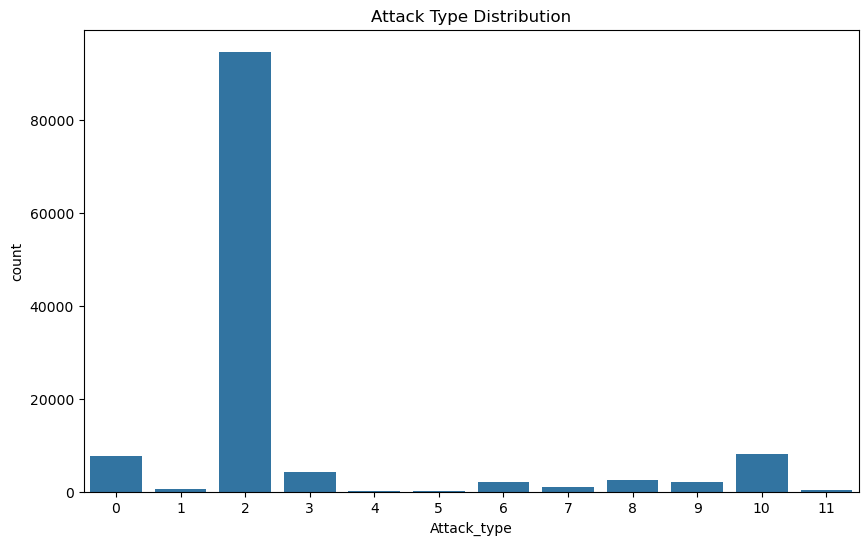

In [125]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Attack_type", data=df)
plt.title("Attack Type Distribution")
plt.show()


## Visualization of Categorical Features

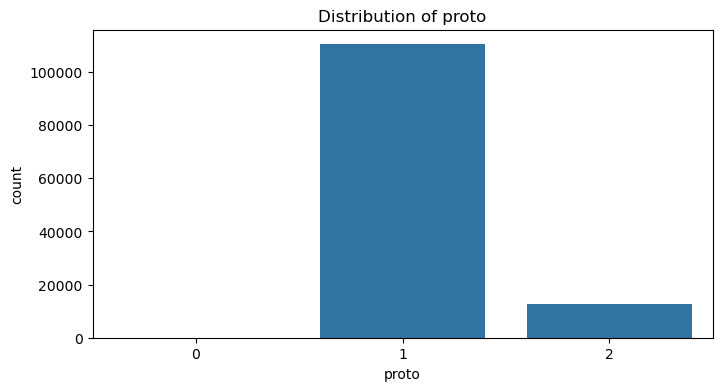

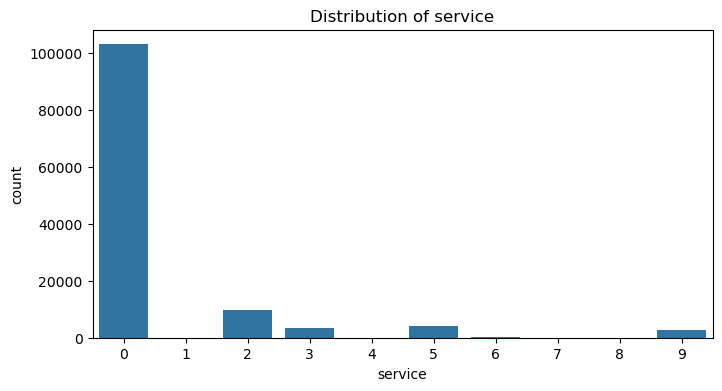

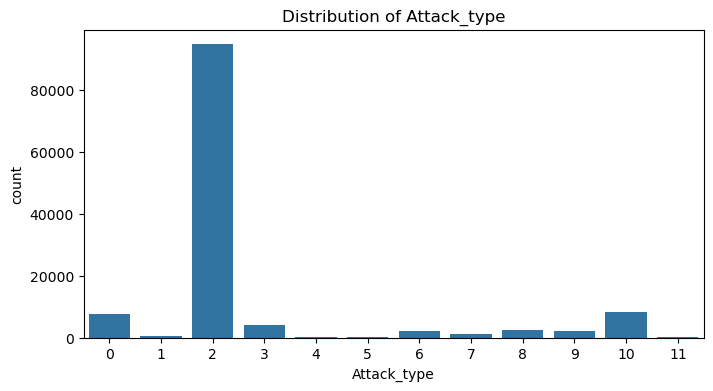

In [127]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


## Numerical Feature Visualization - Boxplot

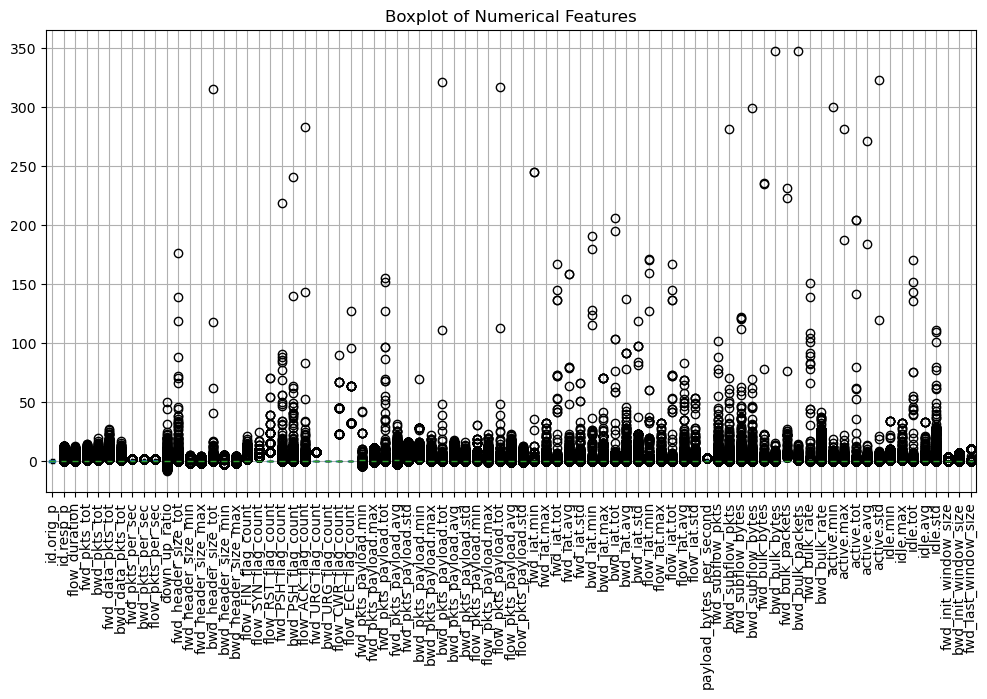

In [129]:
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()

## Correlation Heatmap

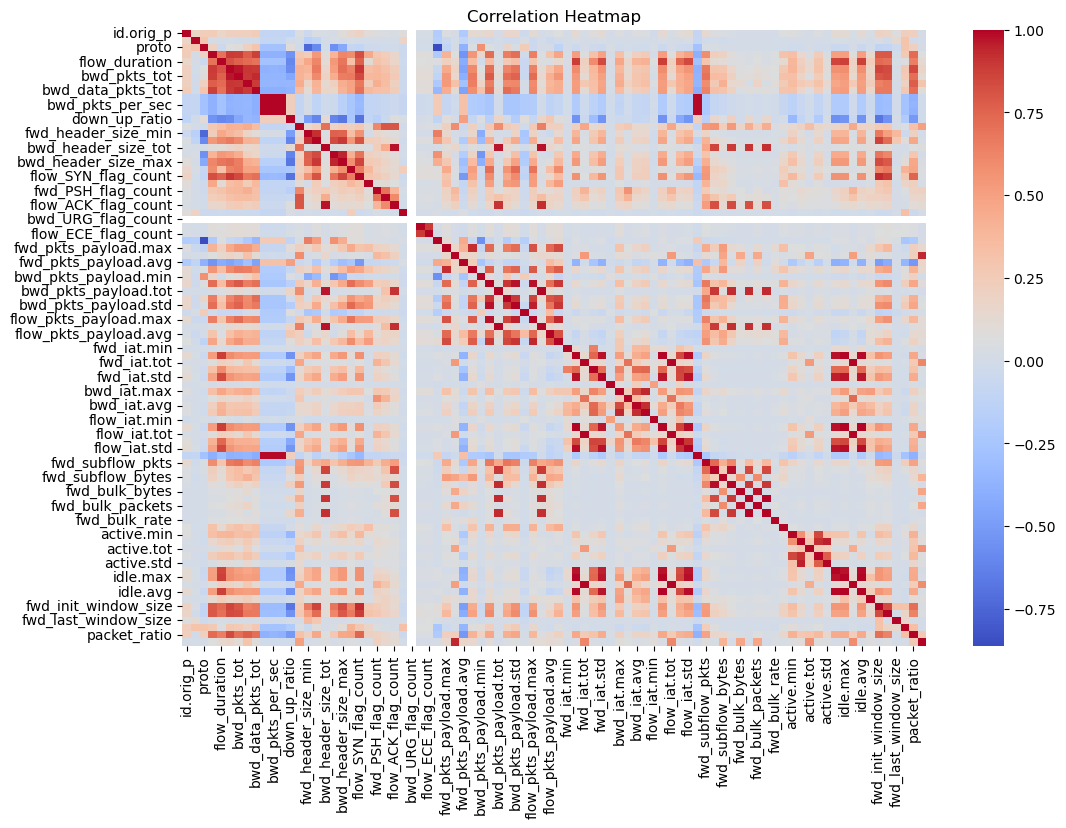

In [131]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Train-Test Split & Model Training

In [133]:
X = df.drop(columns=["Attack_type"], errors='ignore')
y = df["Attack_type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Comparison & Selection

In [138]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, 'predict_proba') else 'N/A'
    print(f"{name} Accuracy: {accuracy:.4f}, AUC: {auc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-"*50)


Logistic Regression Accuracy: 0.9891, AUC: 0.9988228971727051
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1550
           1       0.97      0.79      0.87       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.67      0.86      0.75         7
           5       0.83      0.83      0.83         6
           6       0.99      0.91      0.95       400
           7       0.90      1.00      0.95       200
           8       0.96      0.98      0.97       518
           9       1.00      1.00      1.00       402
          10       0.93      0.97      0.95      1622
          11       0.84      0.61      0.70        51

    accuracy                           0.99     24624
   macro avg       0.92      0.91      0.91     24624
weighted avg       0.99      0.99      0.99     24624

-----------------------------------------------

## Train XGBoost Classifier

In [141]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')
print(f"XGBoost Accuracy: {accuracy:.4f}, AUC: {auc}")
print("Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9984, AUC: 0.9999849309158693
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1550
           1       0.99      0.96      0.98       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.88      1.00      0.93         7
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       0.99      0.99      0.99       518
           9       1.00      1.00      1.00       402
          10       0.99      0.99      0.99      1622
          11       1.00      0.94      0.97        51

    accuracy                           1.00     24624
   macro avg       0.99      0.98      0.98     24624
weighted avg       1.00      1.00      1.00     24624



## Confusion Matrix

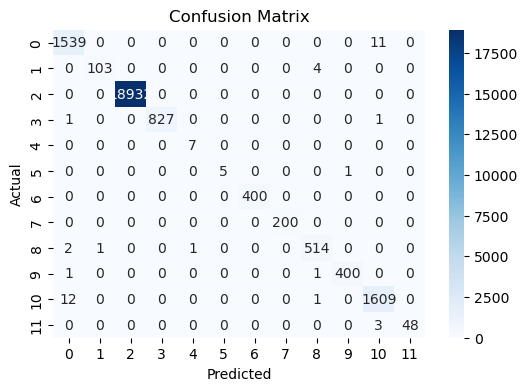

In [143]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Feature Importance Analysis

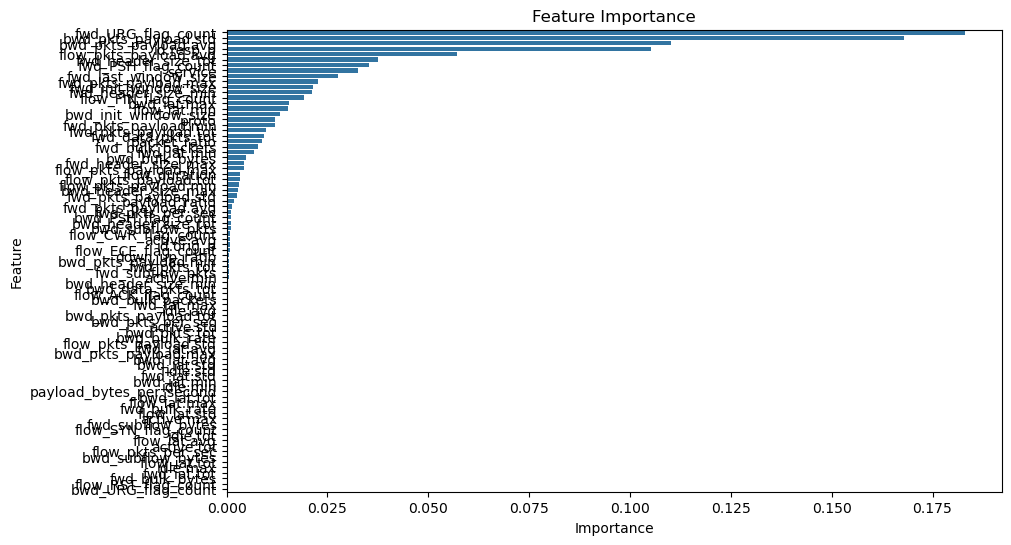

In [146]:
feature_importances = xgb_model.feature_importances_
df_importance = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=df_importance["Importance"], y=df_importance["Feature"])
plt.title("Feature Importance")
plt.show()


## Fine-Tuning XGBoost

In [148]:
param_grid = {'max_depth': [3, 6], 'learning_rate': [0.1, 0.2], 'n_estimators': [50, 100]}
grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}


## Test Model with Sample Inputs

In [150]:
import random
random_idx = random.randint(0, len(X_test) - 1)
sample_test = X_test.iloc[[random_idx]]
prediction_prob = xgb_model.predict_proba(sample_test)
predicted_class = np.argmax(prediction_prob)
predicted_label = label_encoder.inverse_transform([predicted_class])[0]
print(f"\n Model Prediction for Sample Test: {predicted_label}, Probabilities: {prediction_prob}")

print("Model building complete!")


 Model Prediction for Sample Test: DOS_SYN_Hping, Probabilities: [[1.8531441e-07 3.5736403e-07 9.9999154e-01 2.8921983e-07 1.7232084e-07
  1.0345889e-06 5.2263471e-07 5.1898019e-07 2.1824808e-06 9.2502518e-07
  1.3631279e-06 8.5349558e-07]]
Model building complete!
